## 패션 회사 CSV를 가져와서 회귀심화 클론코딩을 해보잣

### 컬럼 정보들 (제미나이에게 물어본 결과)

1. 사용자 식별 및 일반 정보

* index: 데이터프레임의 행 번호입니다.

* identifierHash: 사용자를 고유하게 식별하는 해시값입니다.

* type: 사용자 유형(예: 'user')을 나타냅니다.

* country: 사용자의 국가입니다.

* language: 사용자가 선호하는 언어입니다.

* countryCode: 사용자의 국가를 나타내는 2자리 코드입니다.

2. 소셜 및 활동 정보

* socialNbFollowers: 사용자의 팔로워 수입니다.

* socialNbFollows: 사용자가 팔로우하는 사람의 수입니다.

* socialProductsLiked: 사용자가 '좋아요'한 제품의 수입니다.

* productsListed: 사용자가 판매를 위해 등록한 제품의 수입니다.

* productsSold: 사용자가 판매한 제품의 수입니다.

* productsPassRate: 판매 성공률입니다.

* productsWished: 사용자가 위시리스트에 담은 제품의 수입니다.

* productsBought: 사용자가 구매한 제품의 수입니다.

3. 사용자 프로필 및 상태

* gender: 사용자의 성별(예: 'F' 또는 'M')입니다.

* civilityGenderId: 성별을 나타내는 ID입니다.

* civilityTitle: 사용자의 호칭(예: 'mrs', 'mr')입니다.

* hasAnyApp: 앱을 설치했는지 여부(True/False)입니다.

* hasAndroidApp: 안드로이드 앱을 설치했는지 여부(True/False)입니다.

* hasIosApp: iOS 앱을 설치했는지 여부(True/False)입니다.

* hasProfilePicture: 프로필 사진이 있는지 여부(True/False)입니다.

4. 시간 관련 정보
* daysSinceLastLogin: 마지막 로그인 이후 경과한 일수입니다.

* seniority: 사용자의 가입 후 총 일수입니다.

* seniorityAsMonths: 사용자의 가입 후 경과한 개월 수입니다.

* seniorityAsYears: 사용자의 가입 후 경과한 연수입니다.

### 컬럼명만 보고 느낌으로 방향 정해보기
### 판매성공률을 y로 다른 변수들을 X로 두고 회귀분석하면 되지 않을까? 다만 연속형 변수가 얼마나 있는지는 체크해 봐야함!

In [55]:
import numpy as np
import pandas as pd

# 통계학습 패키지
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 머신러닝 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정입니다
%matplotlib inline

# 경고 메시지를 무시합니다
import warnings
warnings.filterwarnings('ignore')

In [56]:
#패션 사용자 csv를 받아오고 인덱스 컬럼 지우기 
df = pd.read_csv('fashion_company_users.csv')
df.drop('index',axis=1,inplace=True)
df

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,-5324380437900495747,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.80,8.9,us
98909,-5607668753771114442,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.9,fr
98910,350630276238833248,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.9,be
98911,2006580738726207028,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.80,8.9,it


In [57]:
#결측치 확인
df.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

## 위 결과를 보면 회귀분석에 쓸만한 컬럼은
### 4,5,6,7,8,9,10,11,13,19,20,21,22 번째 정도이다.
### 그중 13은 성별 아이디라 너무 범주형같아서 제외하는게 좋을 것 같다.

In [59]:
#필요없는 컬럼들 제외하기
drop_culmns= [0,1,2,3,12,13,14,15,16,17,18,23]
data=df.drop(df.columns[drop_culmns],axis=1)
data

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
0,3,8,0,0,0,0.0,0,0,709,3205,106.83,8.9
1,3,8,0,0,0,0.0,0,0,709,3205,106.83,8.9
2,3,8,0,0,0,0.0,0,0,689,3205,106.83,8.9
3,3,8,0,0,0,0.0,0,0,709,3205,106.83,8.9
4,3,8,0,0,0,0.0,0,0,709,3205,106.83,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...
98908,3,8,0,0,0,0.0,0,0,708,3204,106.80,8.9
98909,3,8,0,0,0,0.0,0,0,695,3204,106.80,8.9
98910,3,8,0,0,0,0.0,0,0,520,3204,106.80,8.9
98911,3,8,0,0,0,0.0,0,0,267,3204,106.80,8.9


In [60]:
df_stats = data.describe().T # 전치시키는 연산. 행과 열의 위치를 바꿔줘요. 

median_results = []
skew_results = []
kurtosis_results = []
null_results = []

for idx, val in enumerate(df_stats.index):
    median_results.append(data[val].median())
    skew_results.append(data[val].skew())
    kurtosis_results.append(data[val].kurtosis())
    null_results.append(data[val].isnull().sum())

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results
df_stats

,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
socialNbFollowers,98913.0,3.432269,3.882383,3.00,3.00,3.00,3.00,744.00,3.00,0,88.816910,14415.307033
socialNbFollows,98913.0,8.425677,52.839572,0.00,8.00,8.00,8.00,13764.00,8.00,0,220.876679,52718.389101
socialProductsLiked,98913.0,4.420743,181.030569,0.00,0.00,0.00,0.00,51671.00,0.00,0,244.157743,67765.241221
productsListed,98913.0,0.093304,2.050144,0.00,0.00,0.00,0.00,244.00,0.00,0,64.893219,5760.301256
productsSold,98913.0,0.121592,2.126895,0.00,0.00,0.00,0.00,174.00,0.00,0,41.595633,2355.673441
productsPassRate,98913.0,0.812303,8.500205,0.00,0.00,0.00,0.00,100.00,0.00,0,10.667299,114.039122
productsWished,98913.0,1.562595,25.192793,0.00,0.00,0.00,0.00,2635.00,0.00,0,49.256959,3369.163069
productsBought,98913.0,0.171929,2.332266,0.00,0.00,0.00,0.00,405.00,0.00,0,84.797360,11871.759751
daysSinceLastLogin,98913.0,655.732310,7407.430369,11.00,572.00,694.00,702.00,737028.00,694.00,0,99.322825,9871.082314
seniority,98913.0,3063.771870,168.298621,2852.00,2857.00,3196.00,3201.00,3205.00,3196.00,0,-0.427090,-1.816504


### 우리의 타겟은 productsPassRate인데 왜도가 10으로 관측된다. 그럼 자연로그를 사용해보자

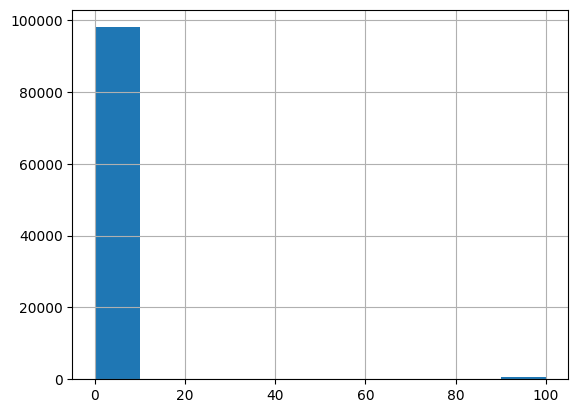

In [61]:
data['productsPassRate'].hist()
plt.show()

ValueError: supplied range of [-inf, 4.605170185988092] is not finite

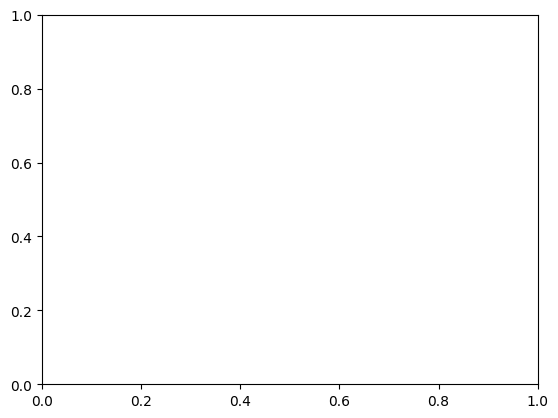

In [62]:
np.log(data['productsPassRate']).hist()
plt.show()

### 위 코드를 진행하면 오류가 나온다 이유가 뭘까? 바로 0값은 로그변환시 마이너스 무한대로 변환되기때문이었다... 
### 그렇다면 0값을 모두 제외해보면 어떨까

In [63]:
total_count = df['productsPassRate'].count()
count_zero = (data['productsPassRate'] == 0).sum()
print(f"productsPassRate 컬럼의 총 데이터 수: {total_count}")
print(f"productsPassRate 컬럼에서 0값인 데이터의 개수: {count_zero}")

productsPassRate 컬럼의 총 데이터 수: 98913
productsPassRate 컬럼에서 0값인 데이터의 개수: 97979


### 0값인 애들이 생각보다 많았다.. 만약 제외하면 천개정도만 남을텐데.. 데이터수가 적어져서 조금 걱정된다

In [64]:
#productsPassRate가 0인애들은 제외후 df_filtered에 새로 저장
df_filtered = data[data['productsPassRate'] != 0]
df_filtered

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
164,10,8,0,0,3,66.0,0,0,665,3205,106.83,8.9
614,8,8,0,4,3,100.0,0,0,82,3205,106.83,8.9
1054,29,8,33,2,2,100.0,17,8,377,3204,106.80,8.9
1227,11,8,23,0,3,100.0,0,0,87,3204,106.80,8.9
1660,3,9,7,4,3,66.0,1,0,23,3203,106.77,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...
98191,17,10,81,20,20,100.0,80,9,11,3204,106.80,8.9
98260,8,9,29,25,20,92.8,0,1,14,3204,106.80,8.9
98408,21,9,3,20,27,85.0,0,0,11,3204,106.80,8.9
98501,54,8,5,102,63,98.0,3,0,293,3204,106.80,8.9


In [65]:
df_stats_1 = df_filtered.describe().T # 전치시키는 연산. 행과 열의 위치를 바꿔줘요. 

median_results = []
skew_results = []
kurtosis_results = []
null_results = []

for idx, val in enumerate(df_stats_1.index):
    median_results.append(df_filtered[val].median())
    skew_results.append(df_filtered[val].skew())
    kurtosis_results.append(df_filtered[val].kurtosis())
    null_results.append(df_filtered[val].isnull().sum())

df_stats_1['median'] = median_results
df_stats_1['missing'] = null_results
df_stats_1['skewness'] = skew_results
df_stats_1['kurtosis'] = kurtosis_results
df_stats_1

,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
socialNbFollowers,934.0,17.797645,33.642544,3.00,6.00,10.00,18.00,744.00,10.00,0,12.801481,245.239613
socialNbFollows,934.0,40.880086,538.706066,0.00,8.00,8.00,9.00,13764.00,8.00,0,21.906793,512.114596
socialProductsLiked,934.0,118.694861,1730.782045,0.00,0.00,3.00,23.00,51671.00,3.00,0,28.531018,846.570586
productsListed,934.0,7.715203,19.411609,0.00,0.00,2.00,7.00,244.00,2.00,0,6.864633,61.698328
productsSold,934.0,11.406852,18.667491,1.00,3.00,5.00,11.00,174.00,5.00,0,4.496064,26.137099
productsPassRate,934.0,86.024946,17.935552,25.00,75.00,94.00,100.00,100.00,94.00,0,-1.222943,0.646193
productsWished,934.0,25.351178,128.267768,0.00,0.00,0.00,3.00,1900.00,0.00,0,9.372189,108.847182
productsBought,934.0,3.245182,14.405357,0.00,0.00,0.00,1.00,279.00,0.00,0,11.265283,174.280103
daysSinceLastLogin,934.0,94.748394,148.322538,11.00,12.00,19.00,100.75,684.00,19.00,0,2.119424,3.812455
seniority,934.0,3066.080300,168.007244,2852.00,2857.00,3196.00,3201.00,3205.00,3196.00,0,-0.457096,-1.793698


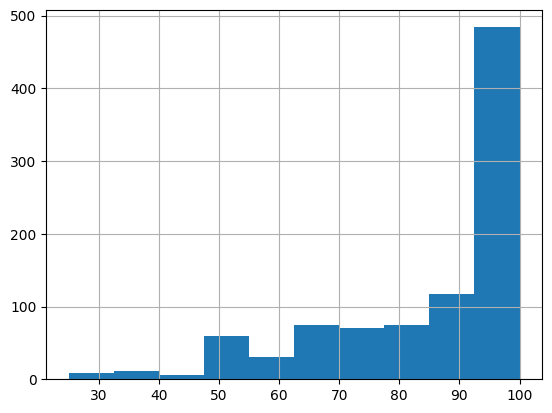

In [66]:
df_filtered['productsPassRate'].hist()
plt.show()

### 여기서 뭔가 이상함을 느꼈다. 왜도가 10이면 분명 왼쪽으로 몰려야 하는데 왜 오른쪽으로 몰리지? 
### 0값을 모두 제외하니 왜도가 다시 음수로 바뀐것이었다.. 그래도 이번엔 왜도값이 -1.22정도밖에 안나오니 괜찮을 것 같다!

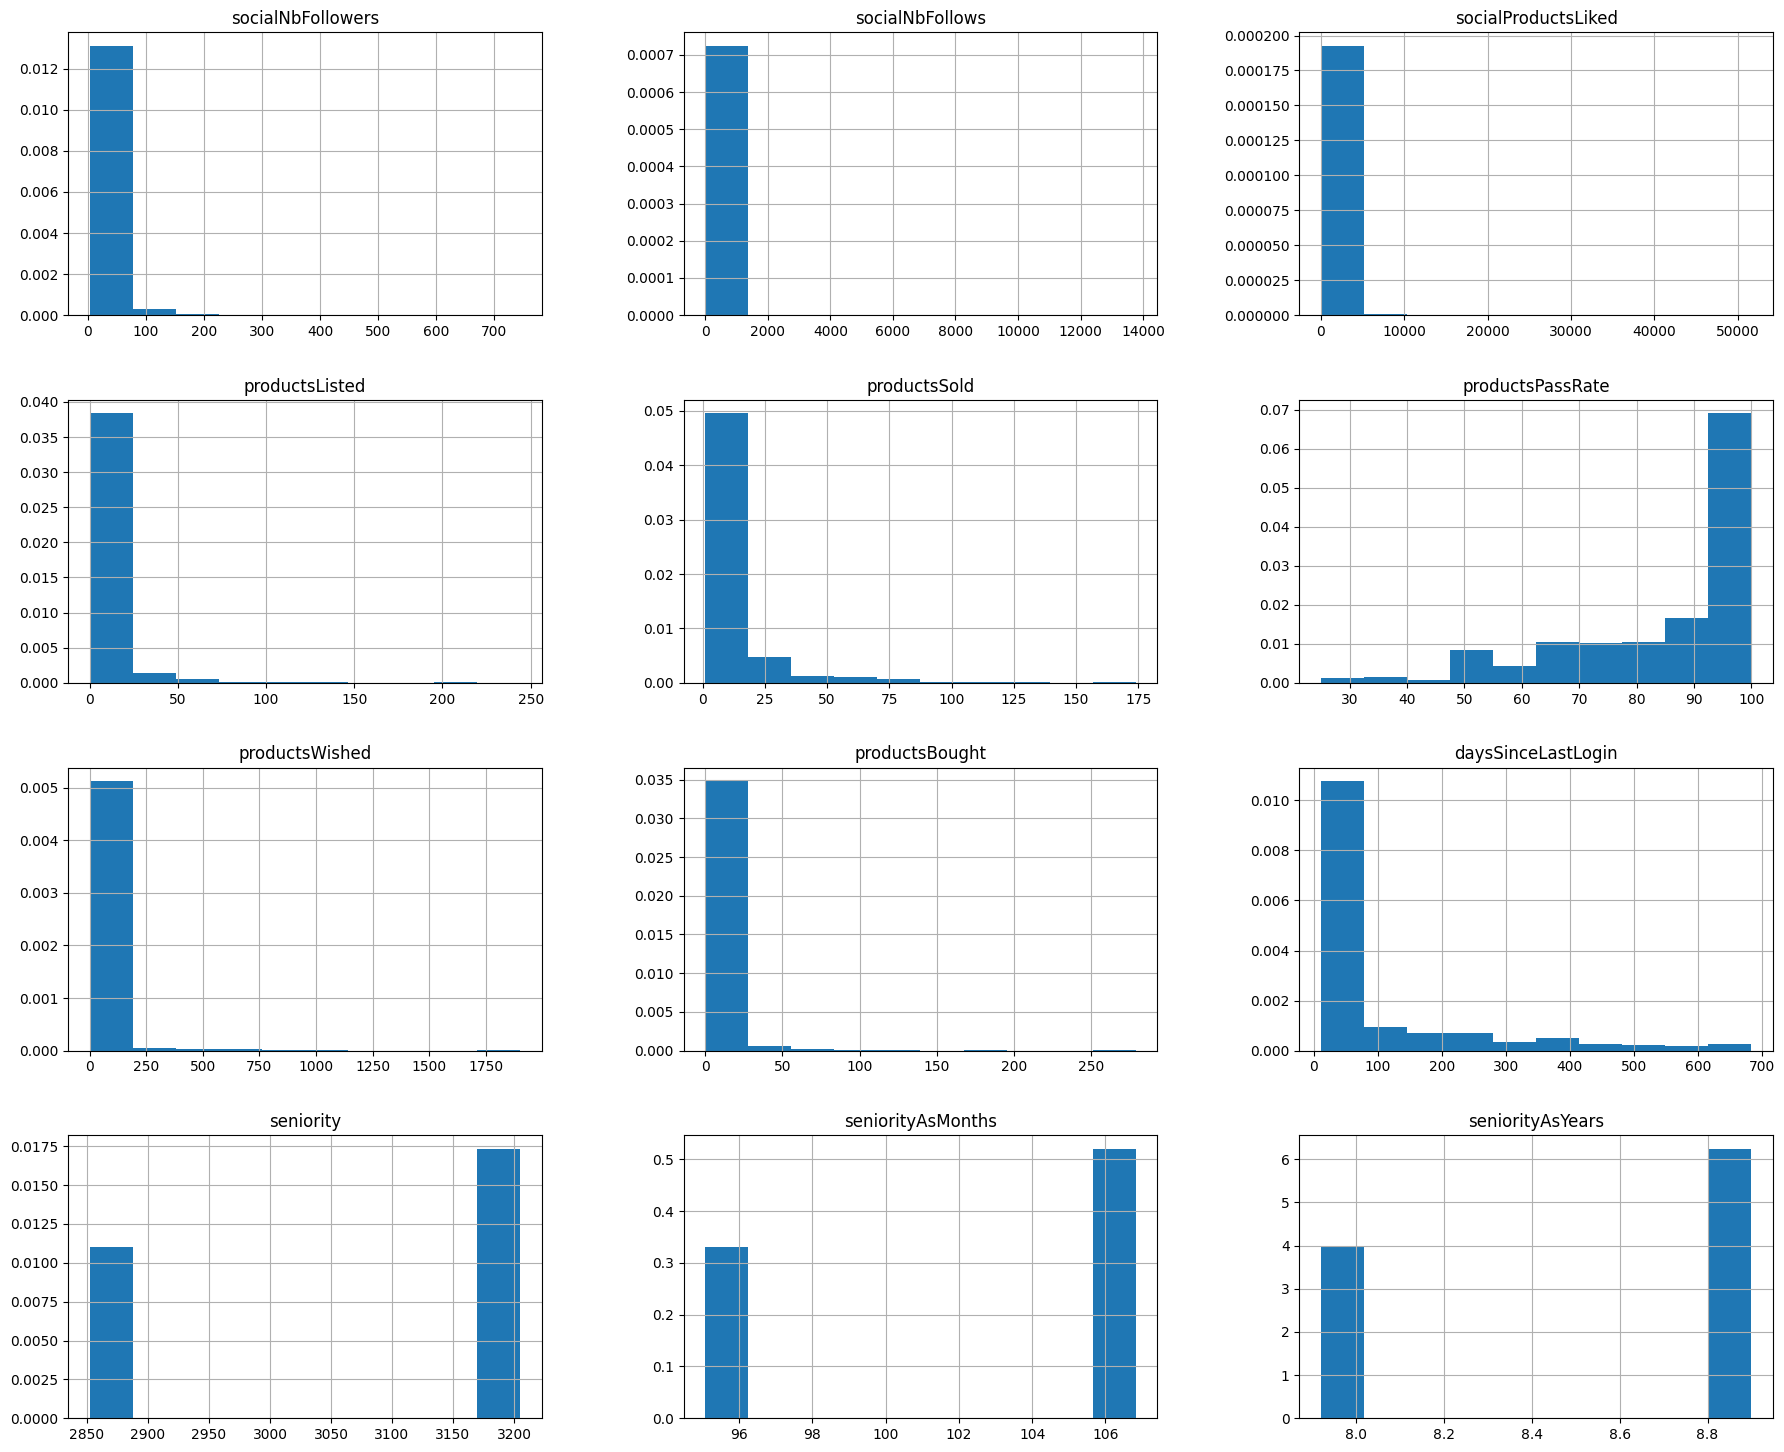

In [67]:
df_filtered.hist(figsize=(22,18), density=True)
plt.show()

### 히스토그램이 왜이렇게 좁게 나오는걸까?
### 그 이유는 이상치들 때문이다. 이상치들이 많다 보니 자연스레 x축이 길어지게 되고 히스토그램이 좁아졌던 것이다. 그럼 이상치들을 제거하고 다시 그래프를 그려보자

In [68]:
columns= df_filtered.columns
def remove_outliers_iqr(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # 이상치에 해당하는 값들을 NaN으로 변환
    df_out = df_in.copy()
    df_out[col_name] = np.where(
        (df_out[col_name] < lower_bound) | (df_out[col_name] > upper_bound),
        np.nan,
        df_out[col_name]
    )
    return df_out

# 모든 수치형 컬럼에 대해 이상치 제거 함수 적용
for col in columns:
    df_filtered = remove_outliers_iqr(df_filtered, col)

# NaN으로 변환된 이상치 행을 제거
df_cleaned = df_filtered.dropna()

print(f"원래 데이터프레임의 행 수: {len(df)}")
print(f"productsPassRate 0값 제거 후의 행 수: {len(df_filtered)}")
print(f"이상치 제거 후 데이터프레임의 행 수: {len(df_cleaned)}")

원래 데이터프레임의 행 수: 98913
productsPassRate 0값 제거 후의 행 수: 934
이상치 제거 후 데이터프레임의 행 수: 406


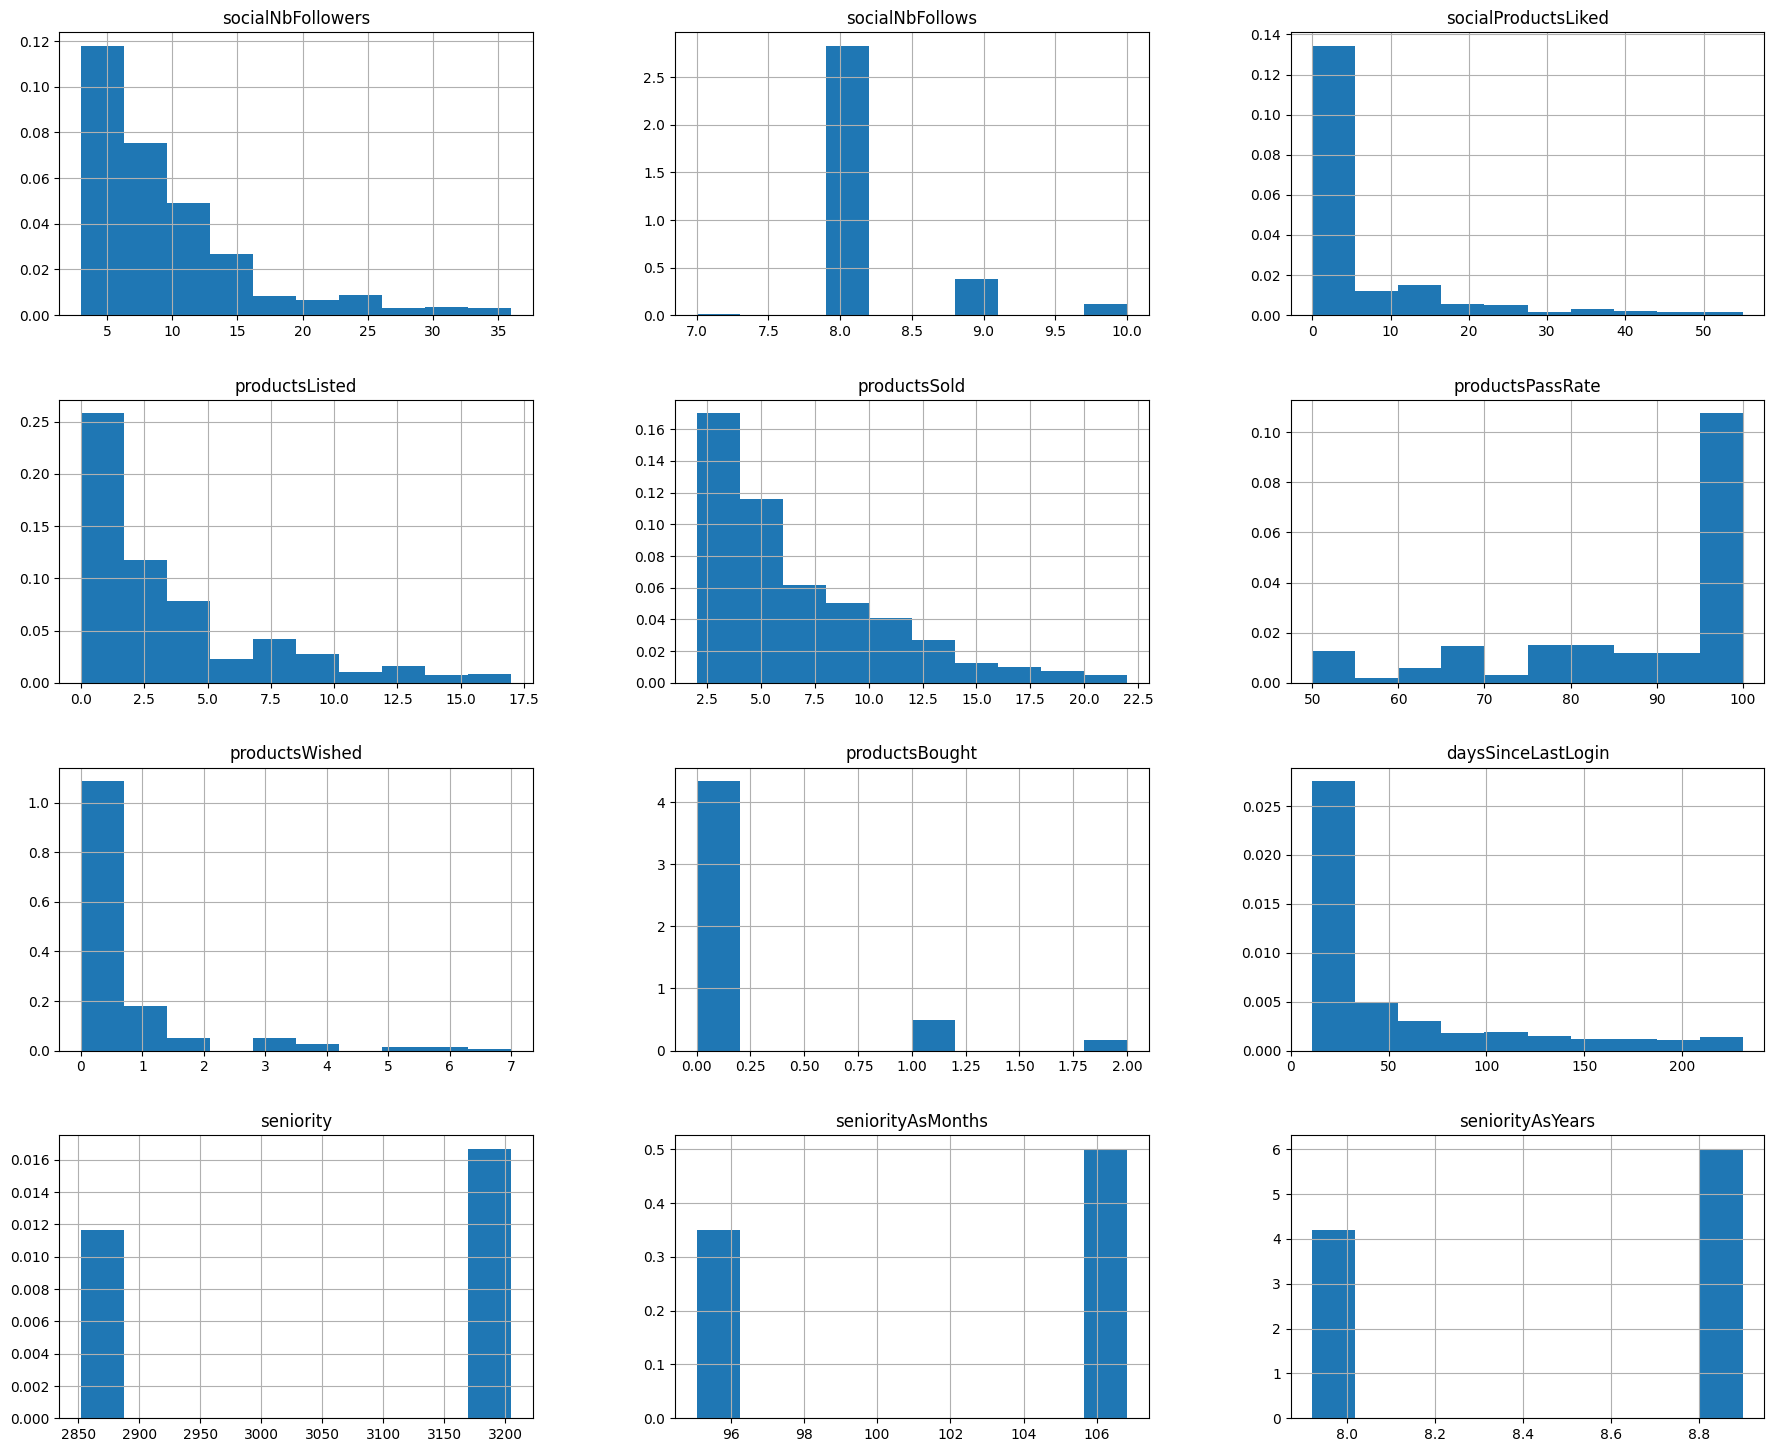

In [69]:
df_cleaned.hist(figsize=(22,18), density=True)
plt.show()

### 이상치를 제거하니 그래프가 달라진 걸 볼 수 있다.
### 상관계수를 찾아보자.

<Axes: >

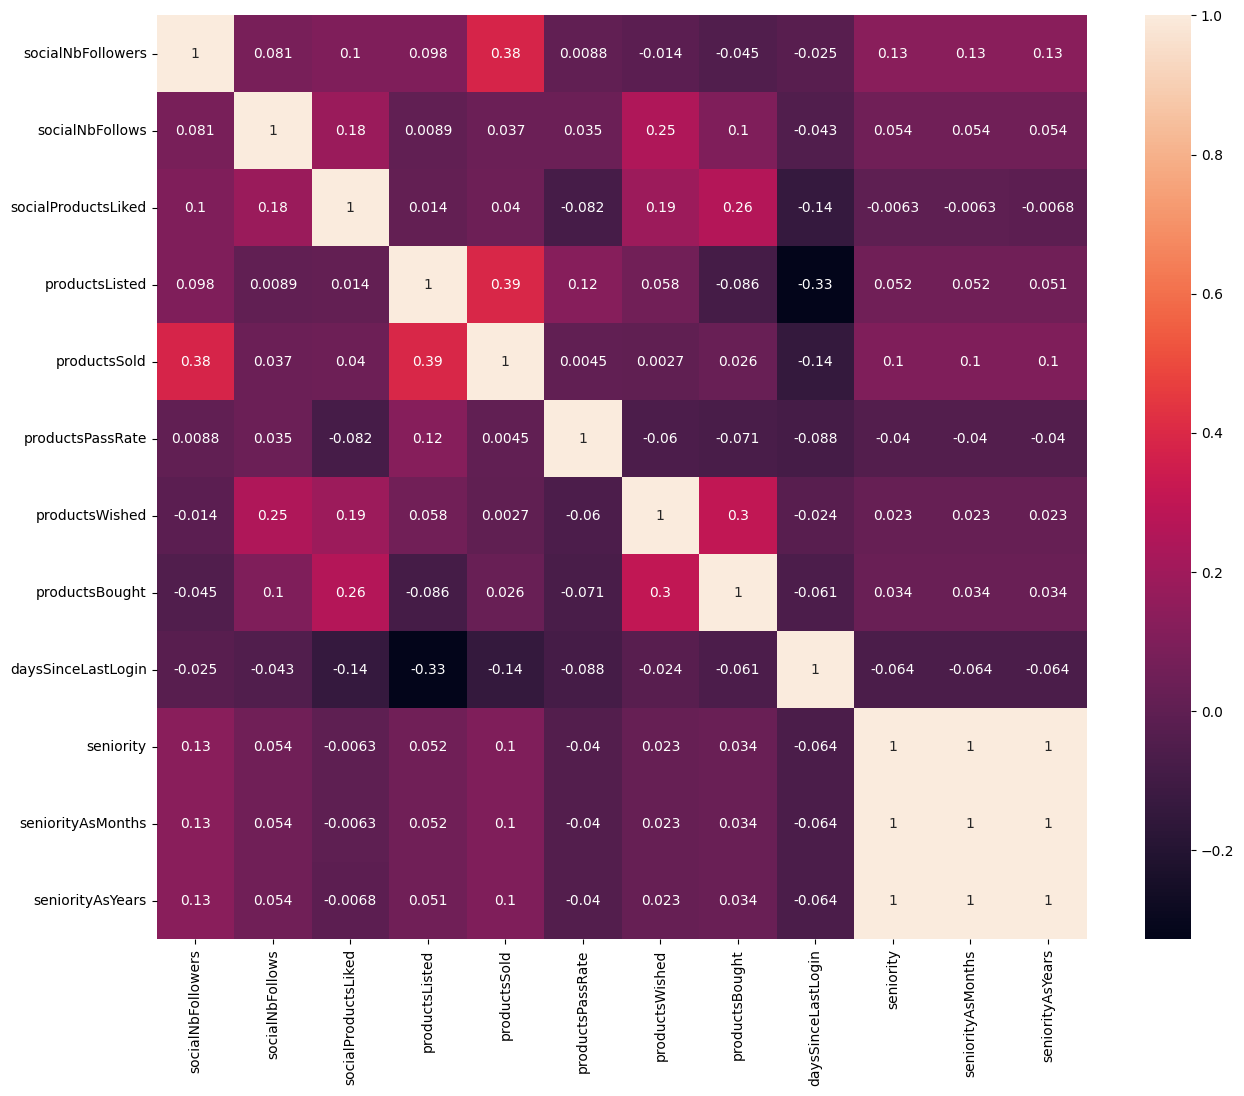

In [73]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_cleaned.corr(),annot=True) 

In [74]:
df_corr = df_cleaned.corr()
df_corr.sort_values(by='productsPassRate', ascending=False)[['productsPassRate']]

,productsPassRate
productsPassRate,1.000000
productsListed,0.122253
socialNbFollows,0.035152
socialNbFollowers,0.008795
productsSold,0.004525
seniority,-0.039640
seniorityAsMonths,-0.039671
seniorityAsYears,-0.039673
productsWished,-0.060496
productsBought,-0.070590


### productsPassRate는 다른 변수들과 상관관계가 거의 없는것 같다... 
### 어쩔수없이 y변수를 다른걸로 바꿀 필요가 생겼다..
### 비슷한 느낌의 productsSold로 다시 시도해보자!
## 0값을 모두 지우고, 왜도를 체크한 다음 로그를 씌웠다.

In [ ]:
# 0값을 지우기 0값이 있으면 로그씌웠을때 오류가 난다.
total_count = df['productsSold'].count()
count_zero = (data['productsSold'] == 0).sum()
print(f"productsSold 컬럼의 총 데이터 수: {total_count}")
print(f"productsSold 컬럼에서 0값인 데이터의 개수: {count_zero}")

#0값을 제외한 후 df_filtered에 새로 할당
df_filtered2 = data[data['productsSold'] != 0]
df_filtered2

productsSold 컬럼의 총 데이터 수: 98913
productsSold 컬럼에서 0값인 데이터의 개수: 96877


,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
46,31,8,0,1,1,0.0,0,1,127,3205,106.83,8.9
133,7,8,6,1,1,0.0,0,0,485,3205,106.83,8.9
164,10,8,0,0,3,66.0,0,0,665,3205,106.83,8.9
242,3,8,0,0,1,0.0,0,0,405,3205,106.83,8.9
588,16,0,6,0,1,0.0,303,32,20,3205,106.83,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...
98501,54,8,5,102,63,98.0,3,0,293,3204,106.80,8.9
98558,5,8,0,0,1,0.0,0,0,706,3204,106.80,8.9
98664,3,8,3,0,1,0.0,8,2,191,3204,106.80,8.9
98690,11,9,1,0,1,0.0,0,0,684,3204,106.80,8.9


In [97]:
# 왜도체크 
df_stats_2 = df_filtered2.describe().T # 전치시키는 연산. 행과 열의 위치를 바꿔줘요. 

median_results = []
skew_results = []
kurtosis_results = []
null_results = []

for idx, val in enumerate(df_stats_2.index):
    median_results.append(df_filtered2[val].median())
    skew_results.append(df_filtered2[val].skew())
    kurtosis_results.append(df_filtered2[val].kurtosis())
    null_results.append(df_filtered2[val].isnull().sum())

df_stats_2['median'] = median_results
df_stats_2['missing'] = null_results
df_stats_2['skewness'] = skew_results
df_stats_2['kurtosis'] = kurtosis_results
df_stats_2

,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
socialNbFollowers,2036.0,11.848723,24.246375,3.00,4.00,6.00,11.00,744.00,6.00,0,16.571549,435.129377
socialNbFollows,2036.0,24.544204,367.788293,0.00,8.00,8.00,9.00,13764.00,8.00,0,31.733855,1086.300225
socialProductsLiked,2036.0,70.349705,1183.479716,0.00,0.00,1.00,12.00,51671.00,1.00,0,41.048730,1779.514989
productsListed,2036.0,3.973477,13.663211,0.00,0.00,1.00,3.00,244.00,1.00,0,9.780308,127.767180
productsSold,2036.0,5.907171,13.626529,1.00,1.00,2.00,5.00,174.00,2.00,0,6.343815,53.324809
productsPassRate,2036.0,39.463310,44.563032,0.00,0.00,0.00,91.00,100.00,0.00,0,0.344113,-1.742946
productsWished,2036.0,18.294204,108.396766,0.00,0.00,0.00,2.00,1916.00,0.00,0,11.463368,161.277010
productsBought,2036.0,2.439096,13.971495,0.00,0.00,0.00,1.00,405.00,0.00,0,17.874170,431.296313
daysSinceLastLogin,2036.0,190.700393,226.993545,11.00,14.00,58.50,346.00,709.00,58.50,0,1.038032,-0.394104
seniority,2036.0,3063.709234,168.489727,2852.00,2857.00,3196.00,3201.00,3205.00,3196.00,0,-0.425676,-1.819435


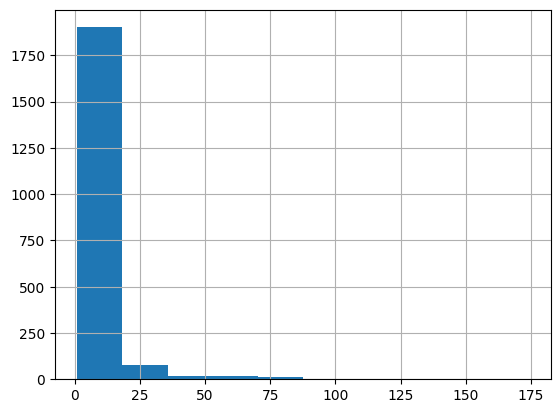

In [98]:
# 왜도가 6.34로 왼쪽으로 몰려있는상태
df_filtered2['productsSold'].hist()
plt.show()

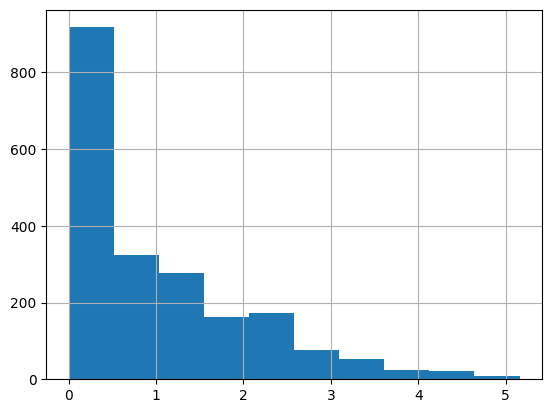

np.float64(1.1850865256713796)

In [99]:
# 로그 씌우니 왜도가 1.18까지 떨어진 모습!
np.log(df_filtered2['productsSold']).hist()
plt.show()
np.log(df_filtered2['productsSold']).skew()

In [ ]:
#이상치 제거!
columns= df_filtered2.columns
def remove_outliers_iqr(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # 이상치에 해당하는 값들을 NaN으로 변환
    df_out = df_in.copy()
    df_out[col_name] = np.where(
        (df_out[col_name] < lower_bound) | (df_out[col_name] > upper_bound),
        np.nan,
        df_out[col_name]
    )
    return df_out

# 모든 수치형 컬럼에 대해 이상치 제거 함수 적용
for col in columns:
    df_filtered2 = remove_outliers_iqr(df_filtered2, col)

# NaN으로 변환된 이상치 행을 제거
df_cleaned2 = df_filtered2.dropna()

print(f"원래 데이터프레임의 행 수: {len(df)}")
print(f"productsPassRate 0값 제거 후의 행 수: {len(df_filtered2)}")
print(f"이상치 제거 후 데이터프레임의 행 수: {len(df_cleaned2)}")

원래 데이터프레임의 행 수: 98913
productsPassRate 0값 제거 후의 행 수: 2036
이상치 제거 후 데이터프레임의 행 수: 1160


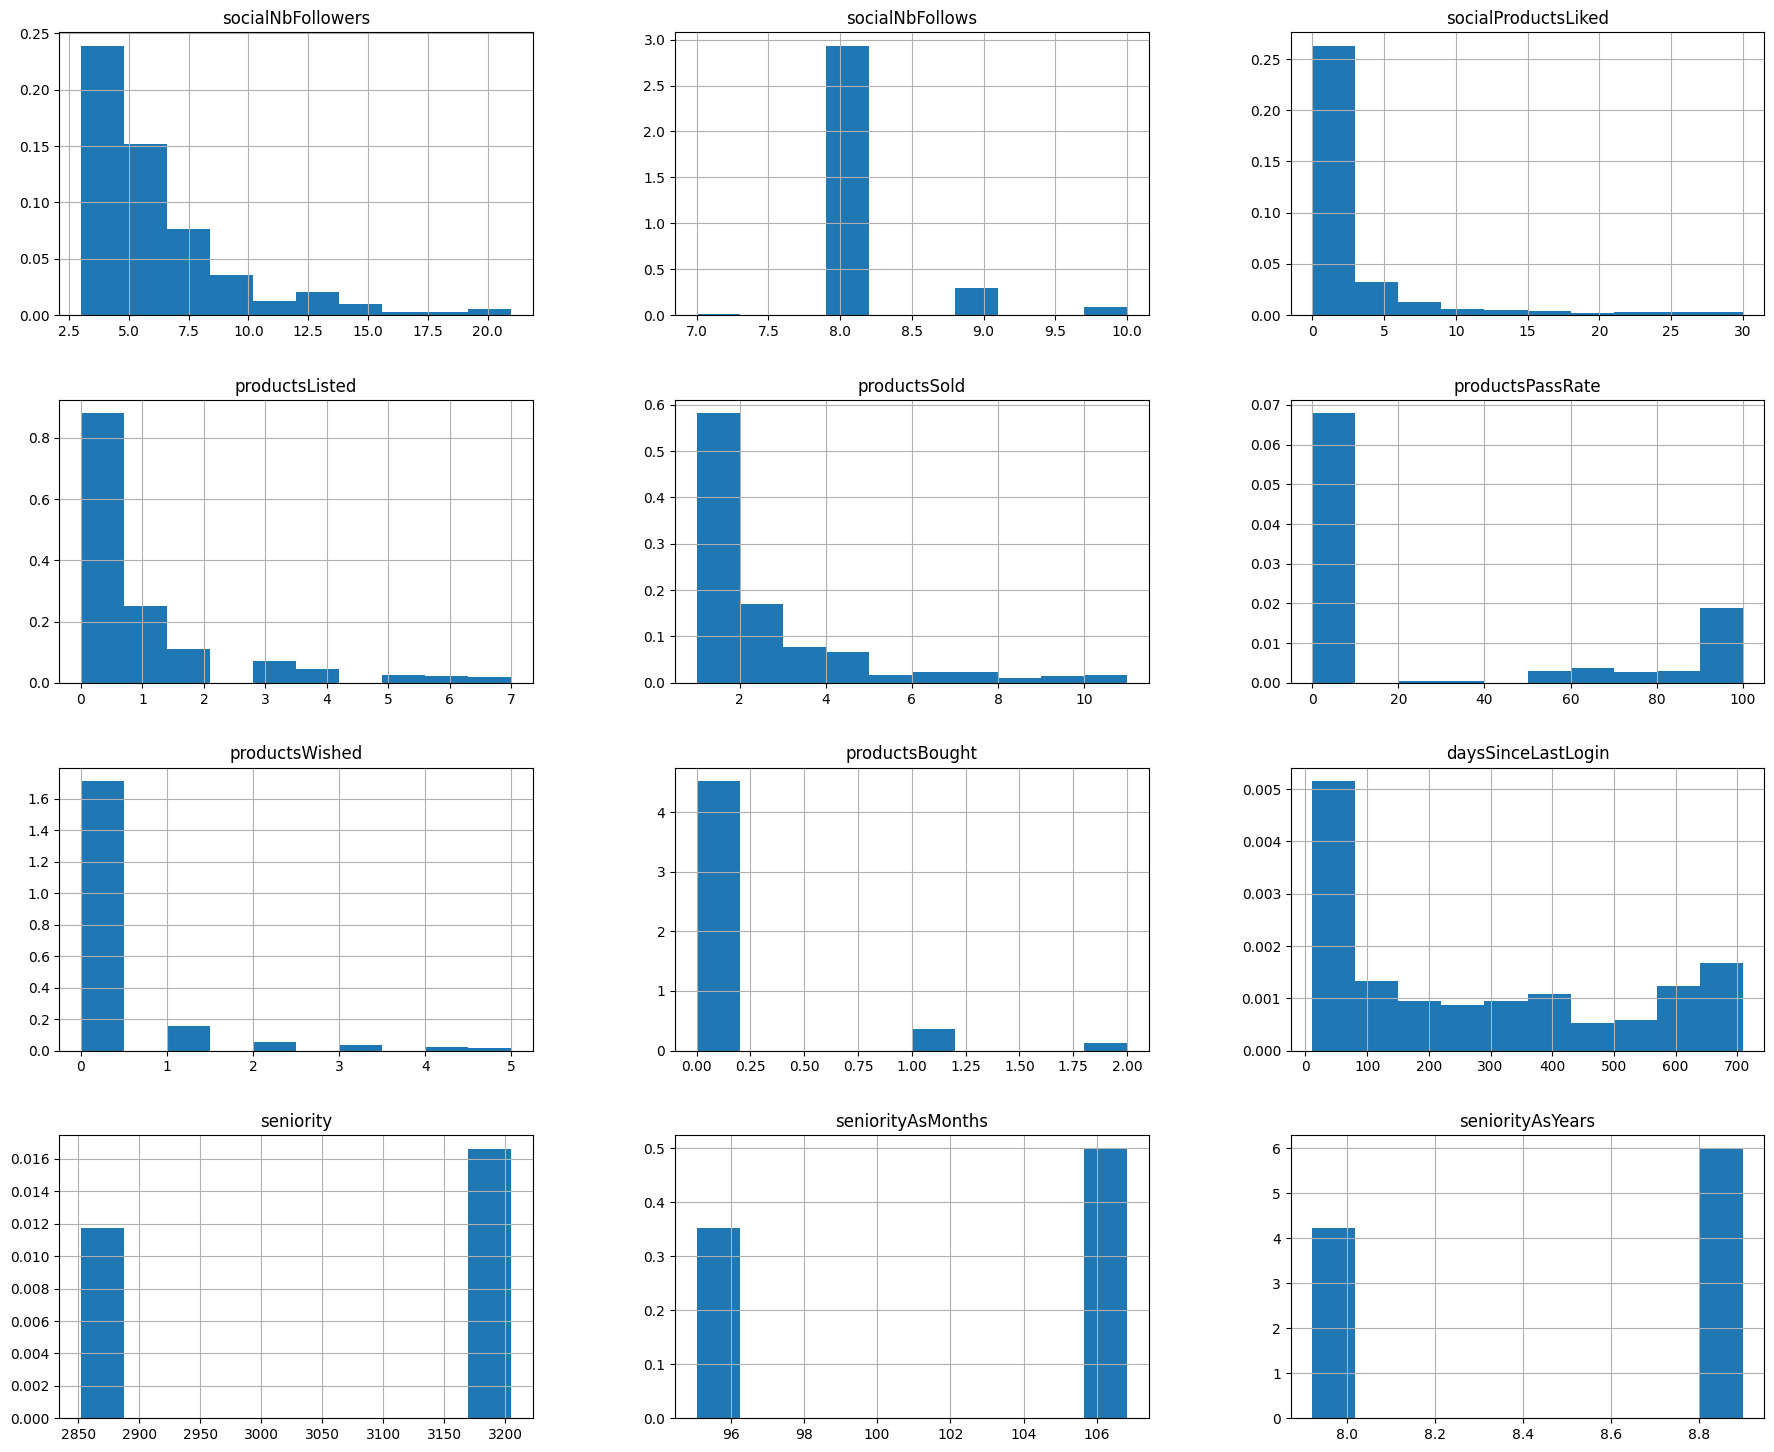

In [101]:
df_cleaned2.hist(figsize=(22,18), density=True)
plt.show()

### 1. 아래의 히트맵을 그려보고 상관계수를 줄세워보니 아까보다 훨씬 좋은 결과가 나왔다. 역시 y변수를 바꾸길 잘한 것같다
### 2. 하지만 그냥 만족하고 넘어가면 인사이트가 없으니 왜 그랬는지 한번 예측해보자
### 3. 첫번째와 두번째 과정은 모두 똑같지만 다른점이 딱 하나 있었다. 그건 바로 0값을 제거하는 과정이 달랐다는 점이다. 전자의 경우 productsPassRate가 0값인 애들을 다 제거하고 시작했고, 후자는 productsSold가 0값인 애들을 다 제거하고 시작했다. 결과또한 달랐는데, 전자의 경우엔 둘의 상관관계가 0에 가까웠지만 후자의 경우엔 둘의 상관관계가 0.66으로 크게 상승한걸 발견했다. 
### 4. 여러가지로 생각해봤는데, 둘다 판매에 성공한 집단을 고른다는 점에서 근본적으로 같아보였기때문에 정답을 못 찾겠었다. 그래서 그냥 예측해보건데 productsPassRate에서 0이 의미하는건 판매시도를 했으나 판매하지 못한 경우와 판매시도조차 안한 경우 모두일 것이다. 
### 5. 따라서 그 모두를 제외하는 건 productSold에서 0을 제외하는 것에 비하면 중구난방으로 제외했다고 볼 수 있고, 그래서 상관계수가 전부 낮게 나온것이 아닐까? 반면 productssold에서 0을 제외하는건 단순히 팔았냐 안팔았냐만의 이분법식으로 고려할 뿐, 팔고자했던 사람들이나 다른 여건들은 고려하지 않았기 때문에 더 직관적인 결과가 나온것 아닐까? 

<Axes: >

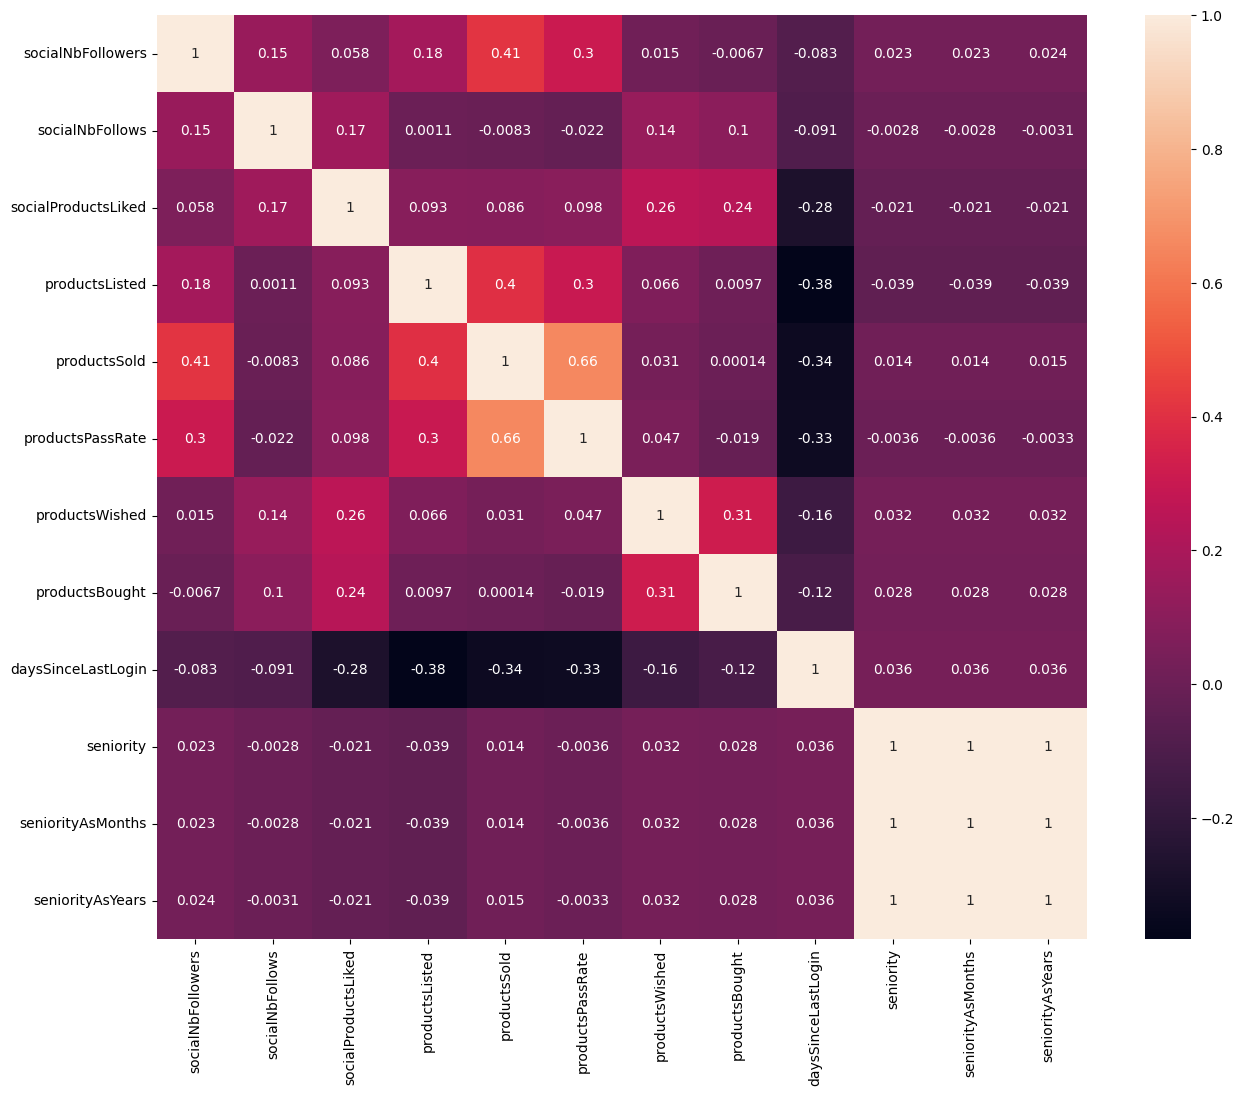

In [102]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_cleaned2.corr(),annot=True) 

In [103]:
df_corr = df_cleaned2.corr()
df_corr.sort_values(by='productsSold', ascending=False)[['productsSold']]

,productsSold
productsSold,1.000000
productsPassRate,0.657425
socialNbFollowers,0.413483
productsListed,0.399025
socialProductsLiked,0.086089
productsWished,0.030990
seniorityAsYears,0.014549
seniority,0.014286
seniorityAsMonths,0.014283
productsBought,0.000145


## 이제부터 본격적인 회귀분석을 진행해보자!
타겟은 productsSold이다. 우선 단순 선형 회귀분석부터 시작해보자

독립 변수들 간의 상관관계를 확인해본 결과 </br>
`productsPassRate`, `socialNbFollowers`, `productsListed`
세 변수들이 상관관계가 높게 나왔다.

세 변수들의 데이터 분포를 살펴보자.

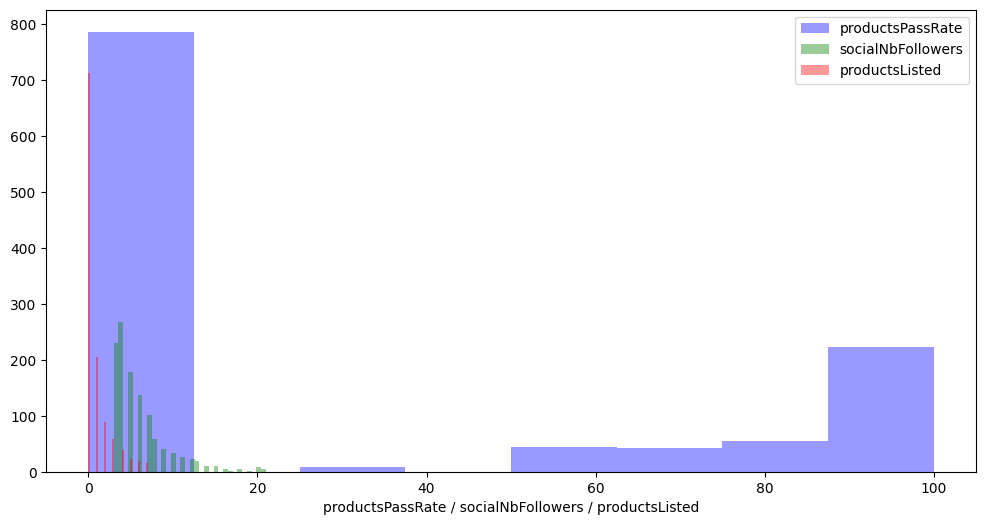

In [105]:
# column 선택
columns = ['productsPassRate', 'socialNbFollowers', 'productsListed']
colors = ['blue','green','red']

living = df[columns]

# 한 번에 보기
plt.figure(figsize=(12,6))

for i in range(3):
    ax = sns.distplot(df_cleaned2[columns[i]], hist=True, norm_hist=False, kde=False, label=columns[i], color=colors[i])
ax.set(xlabel="productsPassRate / socialNbFollowers / productsListed")

plt.legend()
plt.show()

그림에서 볼 수 있듯이 세 변수들의 분포가 비슷하다는 것을 알 수 있다.</br>
따라서 다중공선성이 존재할 경우 이 중 price와 상관관계가 가장 높은 productsPassRate 으로 분석한다.


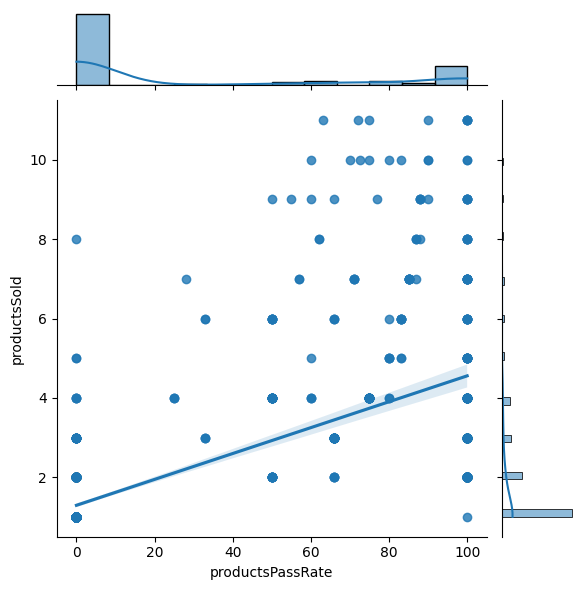

In [106]:
sns.jointplot(x='productsPassRate', y='productsSold', data=df_cleaned2, kind='reg')
plt.show()

In [108]:
X = df[['productsPassRate']]
y = df[['productsSold']]

# 상수항을 추가합니다
X = sm.add_constant(X, has_constant="add")
X.head()

,const,productsPassRate
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [109]:
# 모델 fit
model = sm.OLS(y, X)
result_model = model.fit()
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           productsSold   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                 3.553e+04
Date:                    일, 21 9 2025   Prob (F-statistic):               0.00
Time:                        03:53:24   Log-Likelihood:            -1.9982e+05
No. Observations:               98913   AIC:                         3.996e+05
Df Residuals:                   98911   BIC:                         3.997e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0171      0.006      2.935      0.003       0.006       0.029
productsPassRate     0.1286      0.001    188.504      0.000       0.127       0.130
==============================================================================
Omnibus:                   299266.163   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      36353866676.842
Skew:                          44.940   Prob(JB):                         0.00
Kurtosis:                    2971.625   Cond. No.                         8.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 이번엔 sns팔로워수를 x로 두고 해보자

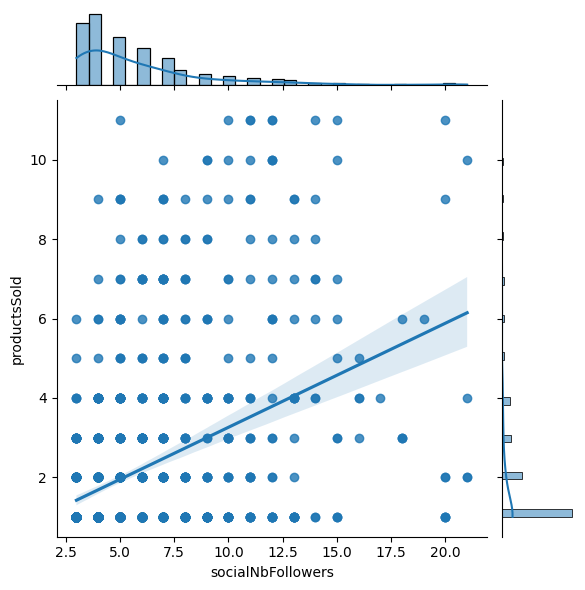

In [111]:
sns.jointplot(x='socialNbFollowers', y='productsSold', data=df_cleaned2, kind='reg')
plt.show()

In [113]:
X = df[['socialNbFollowers']]
y = df[['productsSold']]

# 상수항을 추가합니다
X = sm.add_constant(X, has_constant="add")
X.head()

,const,socialNbFollowers
0,1.0,3
1,1.0,3
2,1.0,3
3,1.0,3
4,1.0,3


In [114]:
model = sm.OLS(y, X)
result_model = model.fit()
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           productsSold   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 6.413e+04
Date:                    일, 21 9 2025   Prob (F-statistic):               0.00
Time:                        03:57:32   Log-Likelihood:            -1.9028e+05
No. Observations:               98913   AIC:                         3.806e+05
Df Residuals:                   98911   BIC:                         3.806e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0577      0.007   -150.438      0.000      -1.071      -1.044
socialNbFollowers     0.3436      0.001    253.240      0.000       0.341       0.346
==============================================================================
Omnibus:                   214541.983   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      24116690739.995
Skew:                          18.278   Prob(JB):                         0.00
Kurtosis:                    2421.734   Cond. No.                         7.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 첫번째 분석에서는 p값은 0.05보다 작아서 귀무가설을 기각할 수 있지만, 결정계수가 너무 낮아 아쉬웠다.
### 두번째 분석에서도 p값은 0.05보다 작아서 귀무가설을 기각할 수 있었고, 결정계수도 첫번째보다 다소 올라 만족스러웠다. 
### 이후로는 다중회귀분석을 진행해보자!

In [117]:
data=data.drop('daysSinceLastLogin',axis=1)

In [118]:
columns = list(data.columns)
df_reg = data[columns]
df_kc_reg = sm.add_constant(df_reg, has_constant='add')
feature_columns = list(df_kc_reg.columns.difference(['productsSold']))

# 변수 선택
X = df_kc_reg[feature_columns]
y = df_kc_reg.productsSold

# 회귀 모형
multi_linear_model = sm.OLS(y, X)
result_model_1 = multi_linear_model.fit()

# 결과
result_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           productsSold   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                 1.937e+04
Date:                    일, 21 9 2025   Prob (F-statistic):               0.00
Time:                        04:05:06   Log-Likelihood:            -1.6136e+05
No. Observations:               98913   AIC:                         3.227e+05
Df Residuals:                   98902   BIC:                         3.228e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2290      0.073    -16.938      0.000      -1.371      -1.087
productsBought         -0.0141      0.002     -7.570      0.000      -0.018      -0.010
productsListed          0.3228      0.002    148.744      0.000       0.319       0.327
productsPassRate        0.0420      0.001     79.203      0.000       0.041       0.043
productsWished         -0.0041      0.000    -22.364      0.000      -0.004      -0.004
seniority              -0.2612      0.051     -5.148      0.000      -0.361      -0.162
seniorityAsMonths       7.4899      1.507      4.970      0.000       4.536      10.444
seniorityAsYears        4.1407      1.358      3.049      0.002       1.479       6.802
socialNbFollowers       0.4073      0.002    235.186      0.000       0.404       0.411
socialNbFollows        -0.0141      0.000    -99.686      0.000      -0.014      -0.014
socialProductsLiked    -0.0003    3.9e-05     -7.978      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   232309.090   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      15743953075.625
Skew:                          22.670   Prob(JB):                         0.00
Kurtosis:                    1956.975   Cond. No.                     1.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

결과를 보면 모든 독립 변수들의 p>|t| (p-value) 유의 확률이 유의 수준 0.05보다 훨씬 작아 모형 통계학적 유의성이 확인된다.</br>
R-squared 값이 0.662 로써 약 66%가 모형에 의해 설명된다는 것을 알 수 있었다.

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = pd.DataFrame()
df_vif["VIF"] = np.round([variance_inflation_factor(df_reg.values, i) for i in range(df_reg.shape[1])], 2)

df_vif["features"] = df_reg.columns
df_vif.sort_values(by='VIF', ascending=False)

,VIF,features
8,1.561442e+09,seniority
9,1.529493e+09,seniorityAsMonths
10,8.551016e+06,seniorityAsYears
0,8.070000e+00,socialNbFollowers
1,4.080000e+00,socialNbFollows
2,3.220000e+00,socialProductsLiked
4,2.960000e+00,productsSold
3,1.570000e+00,productsListed
5,1.410000e+00,productsPassRate
6,1.380000e+00,productsWished


### 위 표를 보면 다중 공선성 문제가 존재한다! 
따라서 몇가지 변수들만 추려서 분석 후 공선성 문제가 해결되는지 확인해보자 </br>
5가지 변수들 : 'socialNbFollowers','socialProductsLiked','productsListed','productsSold','productsPassRate'

In [120]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   socialNbFollowers    98913 non-null  int64  
 1   socialNbFollows      98913 non-null  int64  
 2   socialProductsLiked  98913 non-null  int64  
 3   productsListed       98913 non-null  int64  
 4   productsSold         98913 non-null  int64  
 5   productsPassRate     98913 non-null  float64
 6   productsWished       98913 non-null  int64  
 7   productsBought       98913 non-null  int64  
 8   seniority            98913 non-null  int64  
 9   seniorityAsMonths    98913 non-null  float64
 10  seniorityAsYears     98913 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 8.3 MB


In [129]:
df_filtered3 = df[df['productsSold'] != 0].copy()
df_reg = df_filtered3[['socialNbFollowers','socialProductsLiked','productsListed','productsSold','productsPassRate']]

df_kc_reg = sm.add_constant(df_reg, has_constant='add')
feature_columns = list(df_kc_reg.columns.difference(['productsSold']))

X = df_kc_reg[feature_columns]
y = np.log(df_kc_reg.productsSold)

# 회귀 모형
multi_linear_model = sm.OLS(y, X)
result_model_2 = multi_linear_model.fit()
result_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           productsSold   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1187.
Date:                    일, 21 9 2025   Prob (F-statistic):               0.00
Time:                        04:19:25   Log-Likelihood:                -1857.4
No. Observations:                2036   AIC:                             3725.
Df Residuals:                    2031   BIC:                             3753.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0551      0.019      2.938      0.003       0.018       0.092
productsListed          0.0162      0.001     14.973      0.000       0.014       0.018
productsPassRate        0.0147      0.000     46.509      0.000       0.014       0.015
socialNbFollowers       0.0197      0.001     22.387      0.000       0.018       0.021
socialProductsLiked    -0.0002   1.71e-05    -12.864      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      153.739   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              775.886
Skew:                           0.115   Prob(JB):                    3.30e-169
Kurtosis:                       6.015   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
df_vif = pd.DataFrame()
df_vif["VIF"] = np.round([variance_inflation_factor(df_reg.values, i) for i in range(df_reg.shape[1])], 2)

df_vif["features"] = df_reg.columns
df_vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,4.50,socialNbFollowers
3,3.00,productsSold
1,2.49,socialProductsLiked
2,1.57,productsListed
4,1.47,productsPassRate


### p값이 모두 0.05보다 낮아 통계학적 유의성을 확보했고, 결정계수도 0.7로 높았다. 또한 다중공선성도 매우 개선됐음을 알 수 있다.
### 회귀모형의 가정 진단을 진행해보자!

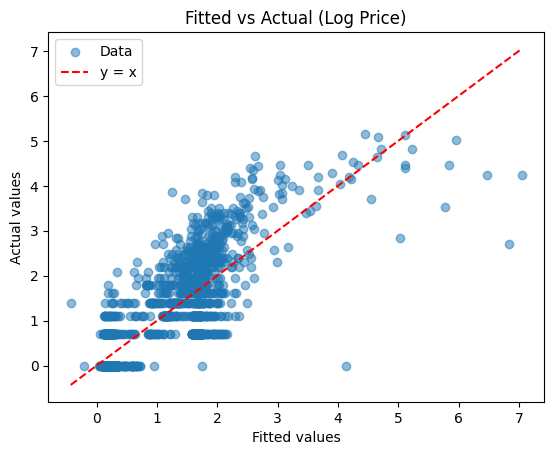

In [131]:
import matplotlib.pyplot as plt

fitted = result_model_2.fittedvalues

plt.scatter(fitted, y, alpha=0.5, label='Data')

# 대각선 추가
min_val = min(fitted.min(), y.min())
max_val = max(fitted.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

plt.xlabel('Fitted values')
plt.ylabel('Actual values')
plt.title('Fitted vs Actual (Log Price)')
plt.legend()
plt.show()

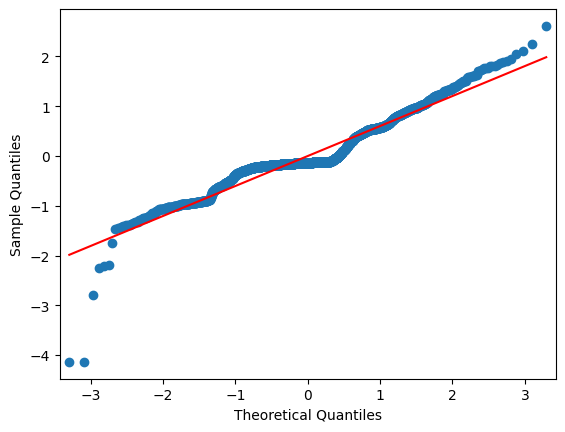

In [132]:
qqplot = sm.qqplot(result_model_2.resid, line="s")
plt.show() 

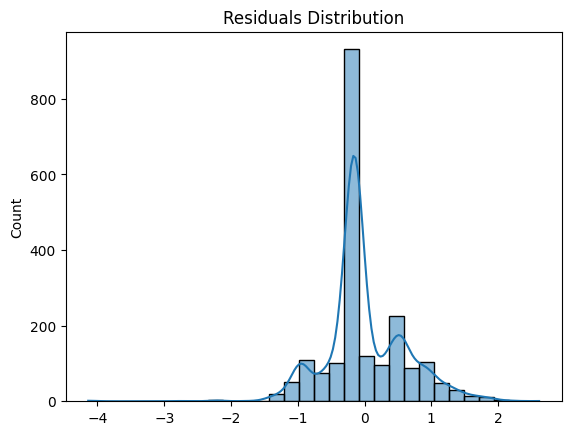

In [133]:
resid = result_model_2.resid
sns.histplot(resid, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.show()

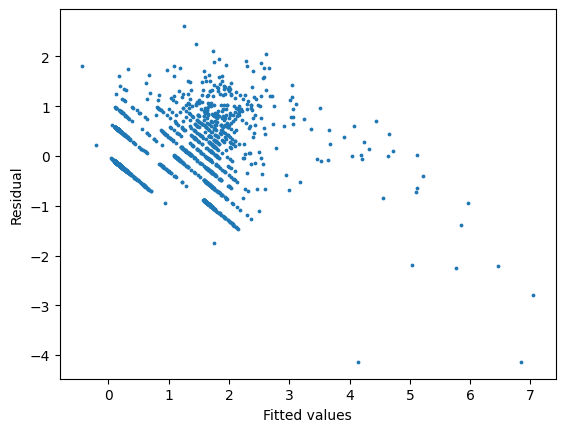

In [134]:
# 잔차 패턴 확인
fitted = result_model_2.predict()

resid = result_model_2.resid
pred = result_model_2.predict(X)

fig = plt.scatter(pred, resid, s=3)

plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [135]:
# 샤피로 - 월크 검정
result_shapiro = stats.shapiro(result_model_2.resid)

print(f"F value : {result_shapiro[0]:.4f} / p-value : {result_shapiro[1]:.4f}")

if result_shapiro[1] < 0.05:
    print("p-value < 0.05 입니다.")

F value : 0.9256 / p-value : 0.0000
p-value < 0.05 입니다.


In [136]:
# 관측치 개수 확인
print(f"관측치는: {len(result_model_2.resid)}")

관측치는: 2036


### 샤피로 월크 검정에서는 p값이 낮아 가설을 기각해야한다. 관측치가 엄청 많은것도 아니기 때문에 정규성 가정을 기각해야한다.. 다만 q-q플롯은 조금 울퉁불퉁하지만 나름 선형인것같아서 고민된다.. 

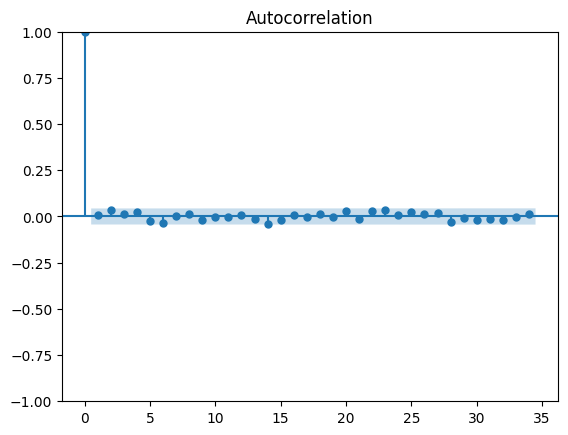

In [137]:
# ACF (Auto-Correlation Function)
sm.graphics.tsa.plot_acf(result_model_2.resid)
plt.show()

In [138]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(result_model_2.resid)
print(f'Durbin-Watson stat: {dw_stat:.3f}')

Durbin-Watson stat: 1.968


ACF와 Durbin-Watson을 이용해 독립성 만족 여부를 확인할 수 있었다.<BR>
Durbin-Watson이 2에 가까우면 자기상관이 없다 -> 오차항은 자기상관 되어있지 않다

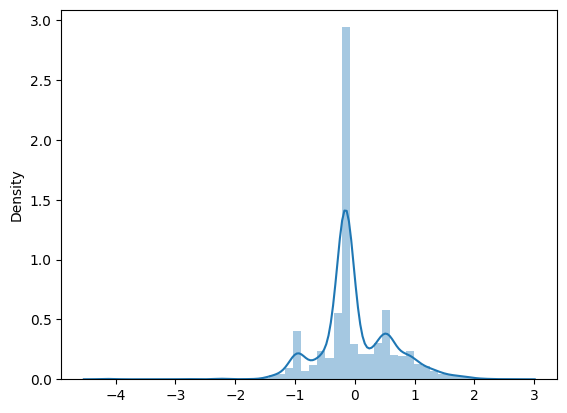

In [139]:
sns.distplot(result_model_2.resid)
plt.show()

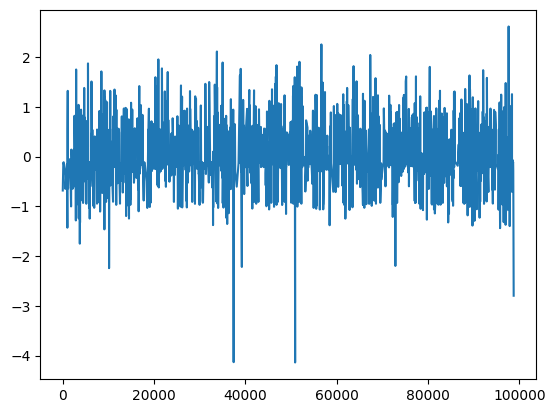

In [140]:
result_model_2.resid.plot()
plt.show()

In [141]:
print(np.mean(result_model_2.resid))

-6.718048950580516e-17


e-17는 엄청나게 작은 숫자, 7에 이것을 곱한 것은 0에 가깝다고 볼 수 있다.


**기본가정 6가지를 어느정도 다 만족하니까 'socialNbFollowers','socialProductsLiked','productsListed','productsSold','productsPassRate'를 독립변수 X로 해서 만든 모델은 y를 예측하기에 적합하다.**

### + 클론코딩하며 했던 생각들
* enumerate 함수는 iterable 객체(리스트, 튜플, 문자열 등)의 각 요소에 대해 인덱스와 값을 동시에 반환한다. 
* 왜도를 줄이기위해 y에 로그를 씌움
* 히트맵 반대쪽 삼각형 안보이게 하는거 매우 좋아보임
* ols분석엔 항상 상수항을 추가해줘야한다는 사실
* 전체 데이터에서 price컬럼을 뺼때 drop을 안쓰고 .difference(['price'])하는건 처음봐서 신기했다.
* VIF로 다중공선성을 체크하는건 이해가 됐는데 연습에선 bedrooms, sqrt_living, waterfront,view,sold-built-years 5개를 선택했는지 의문임. VIF수치가 높은순도 아니고 낮은순도 아니고 임의의 기준이었나? 아님 이것저것해보다 보니 안겹치는 것들로 꾸린걸까?
* 정규성을 검사하는데 잔차 분포를 파악하는건 이해가 되는데 잔차 패턴은 굳이 왜 파악하는지 궁금하다. 잔차 분포가 더 좋은 시각화 아닌가? 
* 샤피로와 qq플롯이 서로 상반되는게 데이터 량에 관계가 있다는게 와닿지 않아서 이유를 찾아봤더니..표본이 클 경우: 아주 미세한, 실질적으로는 중요하지 않은 비정규성까지도 통계적으로 유의하게 감지하여 p-값이 0.05보다 작게 나와 귀무가설을 기각할 수 있다고 한다. (Q-Q plot에서는 거의 완벽한 직선으로 보이지만, p-값은 0.05보다 작게 나올 수 있음)
* acf그래프는x= 0에서 삐죽튀어나오고 이후로는 쭉 y=0에 가까운 모양이었는데, 어떻게 해석해야하는지 궁금해서 검색해보니 x축이 시점이었다는 사실을 알았다. x가2일땐 현시점과 두시점전의 관계를 나타내는 것이었다. 당연히 x=0일떈 스스로와의 관계이니 1이 나오는것이었다. 
* 더빗왓슨은 왜 2가 기준인가 궁금해서 찾아보니 공식자체에 답이 있었는데 자기상관이 없을수록 4*e^2/2*e^2형태가 되어서 약분하니 2가 되는거였다.